Implementation of GPD using SciPy

In [1]:
import math
import numpy as np
import pandas as pd
import scipy
import seaborn as sn
sn.set(rc={'figure.figsize':(11, 4)})

from scipy import stats, optimize
from scipy.stats import genpareto
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import svm



%matplotlib notebook

In [2]:
data = pd.read_csv('study_case1_prms_input.csv')

In [3]:
data

,runoff_obs,basin_cfs_pred,Id,year,month,day,precip,tmax,tmin
0,2.7,3.890482,1,2002,10,1,0.13,57.4,34.6
1,2.7,3.041588,2,2002,10,2,0.97,38.4,29.7
2,2.8,2.796749,3,2002,10,3,0.04,41.2,31.7
3,2.8,2.600715,4,2002,10,4,0.00,52.9,34.0
4,2.6,2.439560,5,2002,10,5,0.00,50.5,34.8
5,2.4,2.313932,6,2002,10,6,0.00,59.1,38.7
6,2.8,2.206870,7,2002,10,7,0.00,59.8,39.8
7,2.5,2.138643,8,2002,10,8,0.00,65.0,42.3
8,2.4,2.074149,9,2002,10,9,0.00,66.7,42.2
9,2.3,2.018152,10,2002,10,10,0.00,67.9,45.3


In [4]:
info = data.info()
        
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 9 columns):
runoff_obs        3653 non-null float64
basin_cfs_pred    3653 non-null float64
Id                3653 non-null int64
year              3653 non-null int64
month             3653 non-null int64
day               3653 non-null int64
precip            3653 non-null float64
tmax              3653 non-null float64
tmin              3653 non-null float64
dtypes: float64(5), int64(4)
memory usage: 256.9 KB
None


In [5]:
from datetime import date

In [6]:
data = data.assign(Date=pd.to_datetime(data[['year', 'month','day']]))

In [7]:
data

,runoff_obs,basin_cfs_pred,Id,year,month,day,precip,tmax,tmin,Date
0,2.7,3.890482,1,2002,10,1,0.13,57.4,34.6,2002-10-01
1,2.7,3.041588,2,2002,10,2,0.97,38.4,29.7,2002-10-02
2,2.8,2.796749,3,2002,10,3,0.04,41.2,31.7,2002-10-03
3,2.8,2.600715,4,2002,10,4,0.00,52.9,34.0,2002-10-04
4,2.6,2.439560,5,2002,10,5,0.00,50.5,34.8,2002-10-05
5,2.4,2.313932,6,2002,10,6,0.00,59.1,38.7,2002-10-06
6,2.8,2.206870,7,2002,10,7,0.00,59.8,39.8,2002-10-07
7,2.5,2.138643,8,2002,10,8,0.00,65.0,42.3,2002-10-08
8,2.4,2.074149,9,2002,10,9,0.00,66.7,42.2,2002-10-09
9,2.3,2.018152,10,2002,10,10,0.00,67.9,45.3,2002-10-10


In [8]:
data.drop(data.columns[[3,4,5]], axis=1, inplace=True)

In [9]:
data

,runoff_obs,basin_cfs_pred,Id,precip,tmax,tmin,Date
0,2.7,3.890482,1,0.13,57.4,34.6,2002-10-01
1,2.7,3.041588,2,0.97,38.4,29.7,2002-10-02
2,2.8,2.796749,3,0.04,41.2,31.7,2002-10-03
3,2.8,2.600715,4,0.00,52.9,34.0,2002-10-04
4,2.6,2.439560,5,0.00,50.5,34.8,2002-10-05
5,2.4,2.313932,6,0.00,59.1,38.7,2002-10-06
6,2.8,2.206870,7,0.00,59.8,39.8,2002-10-07
7,2.5,2.138643,8,0.00,65.0,42.3,2002-10-08
8,2.4,2.074149,9,0.00,66.7,42.2,2002-10-09
9,2.3,2.018152,10,0.00,67.9,45.3,2002-10-10


In [10]:
data = data.set_index('Date')

In [11]:
data

,runoff_obs,basin_cfs_pred,Id,precip,tmax,tmin
Date,,,,,,
2002-10-01,2.7,3.890482,1,0.13,57.4,34.6
2002-10-02,2.7,3.041588,2,0.97,38.4,29.7
2002-10-03,2.8,2.796749,3,0.04,41.2,31.7
2002-10-04,2.8,2.600715,4,0.00,52.9,34.0
2002-10-05,2.6,2.439560,5,0.00,50.5,34.8
2002-10-06,2.4,2.313932,6,0.00,59.1,38.7
2002-10-07,2.8,2.206870,7,0.00,59.8,39.8
2002-10-08,2.5,2.138643,8,0.00,65.0,42.3
2002-10-09,2.4,2.074149,9,0.00,66.7,42.2


In [12]:
from scipy.stats import pareto
r=pareto.fit([1.69,21,0.0,89.1,36.9])
print(r)

(0.4879683314751638, -1.7647517268566721, 1.7647516859938923)


c:\users\jaydeep\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [13]:
#fit svr model for the whole dataset
data.drop(data.columns[[1]], axis=1, inplace=True)

In [14]:
data

,runoff_obs,Id,precip,tmax,tmin
Date,,,,,
2002-10-01,2.7,1,0.13,57.4,34.6
2002-10-02,2.7,2,0.97,38.4,29.7
2002-10-03,2.8,3,0.04,41.2,31.7
2002-10-04,2.8,4,0.00,52.9,34.0
2002-10-05,2.6,5,0.00,50.5,34.8
2002-10-06,2.4,6,0.00,59.1,38.7
2002-10-07,2.8,7,0.00,59.8,39.8
2002-10-08,2.5,8,0.00,65.0,42.3
2002-10-09,2.4,9,0.00,66.7,42.2


[2.7 2.7 2.8 ... 4.2 4.2 4.1]


(array([3.289e+03, 2.260e+02, 5.900e+01, 3.100e+01, 2.400e+01, 8.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00]),
 array([  0.47 ,  11.823,  23.176,  34.529,  45.882,  57.235,  68.588,
         79.941,  91.294, 102.647, 114.   ]),
 <a list of 10 Patch objects>)

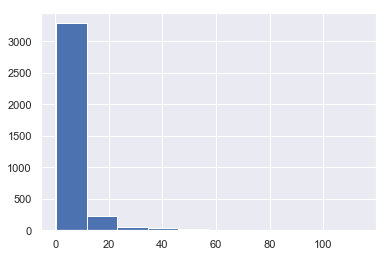

In [15]:
data_values = data.values
features = data_values[:,1:]
values = data_values[:,0]
print(values)
plt.hist(values)

In [16]:
y_df = pd.DataFrame(values, columns=['Data'])
y_df.describe()

,Data
count,3653.000000
mean,5.353047
std,9.514459
min,0.470000
25%,1.400000
50%,2.300000
75%,4.900000
max,114.000000


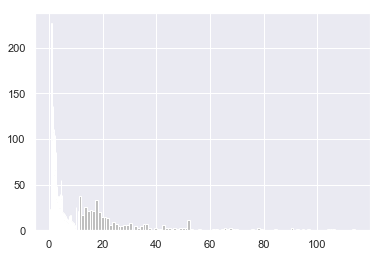

In [17]:
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(values,0), np.percentile(values,90),number_of_bins)
bin_cutoffs1 = np.linspace(np.percentile(values,90), np.percentile(values,100),number_of_bins)
# Create the plot
h = plt.hist(values, bins = bin_cutoffs, color='0.75')
h1 = plt.hist(values, bins = bin_cutoffs1, color='0.75')


Here, it will split the dataset into testing and training dataset using 'train_test_split' function. Also, defined the size of a test dataset. here in our case it's 30% of whole dataset for testing and remaining for training.

Next, we fitted this data to SVR using sklearn function.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, values,test_size=0.3)
from sklearn.svm import SVR
clf = SVR(gamma=0.001, C=1.0, epsilon=0.2)

clf.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Using below function it is finding the accuracy parameter 'RMSE' for SVR.It uses the sklearn python library.

In [19]:
from sklearn.metrics import mean_squared_error
y_pred=clf.predict(X_test)
print("RMSE Value")
mean_squared_error(y_test, y_pred)


RMSE Value


30.000247321904077

Using below function it is finding the accuracy parameter 'R Squared Value' for SVR.It uses the sklearn python library.

In [20]:
from sklearn.metrics import r2_score
print("R squared Value")
r2_score(y_test, y_pred,multioutput='variance_weighted') 

R squared Value


0.6588829190104442